In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')

# Loading Data

In [ ]:
# Read CSVs
debtor_df = pd.read_csv("DebtorExtract.csv")
invoice_df = pd.read_csv("InvoiceExtract.csv")
payment_df = pd.read_csv("PaymentsExtract.csv")

In [ ]:
dfs = {"debt": debtor_df, "invoice":invoice_df, "payment":payment_df}

In [ ]:
def df_eda(df_dict):

    for df_name in df_dict:
        df = df_dict[df_name]
        print("Number of rows: " + str(len(df)))
        
        with pd.ExcelWriter(df_name + ".xlsx") as writer:
            for c in df.columns:
                #Print unique counts of columns
                print("Num unique col " + c + ': ' + str(df[c].nunique()))
                # Print description of column
                print("Description of column: " + c)
                desc = df[c].describe()
                desc.to_excel(writer, sheet_name = c)

In [ ]:
print("Invoice unique customers:" + str(invoice_df["CustomerKey"].nunique()))
print("Invoice unique invoices:" + str(invoice_df["InvoiceKey"].nunique()))
print("Payment unique customers:" + str(payment_df["CustomerKey"].nunique()))
print("Payment unique invoices:" + str(payment_df["InvoiceKey"].nunique()))

Invoice unique customers:83799
Invoice unique invoices:1009327
Payment unique customers:28535
Payment unique invoices:546365


In [ ]:
inv_pay = pd.merge(invoice_df, payment_df, on = ['InvoiceKey', 'CustomerKey'])

In [ ]:
inv_pay

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate,PaymentValue,PaymentDate,PaymentType
0,197057173,16776992,1,2018-01-02,2018-01-02,-645.66,0.0,JRN,2020-09-18 16:21:06.333,-645.66,2018-12-17,Barclays Multi
1,196559812,16837363,1,2018-01-02,2018-01-02,-139.37,0.0,JRN,2020-09-18 16:21:06.333,-139.37,2018-11-01,Barclays Multi
2,195300967,16724474,1,2018-01-03,2018-01-03,-88.50,0.0,JRN,2020-09-18 16:21:06.333,-88.50,2018-09-24,Barclays Multi
3,195519971,16745090,0,2018-01-03,2018-03-02,168.00,0.0,INV,2020-09-18 16:21:06.333,168.00,2018-11-23,Barclays Multi
4,196697217,16817529,1,2018-01-03,2018-01-03,-626.38,0.0,JRN,2020-09-18 16:21:06.333,-626.38,2019-12-17,Barclays Multi
...,...,...,...,...,...,...,...,...,...,...,...,...
361514,196340182,16725749,0,2019-06-30,2019-07-30,95.90,0.0,INV,2020-09-18 16:21:06.333,95.90,2019-08-14,Barclays Multi
361515,196340751,16728765,0,2019-06-30,2019-07-30,406.09,0.0,INV,2020-09-18 16:21:06.333,406.09,2019-08-05,Barclays Multi
361516,196341240,16971160,0,2019-06-30,2019-07-30,130.56,0.0,INV,2020-09-18 16:21:06.333,130.56,2019-07-24,CheckM8
361517,196341411,16764236,0,2019-06-30,2019-07-30,15.00,0.0,INV,2020-09-18 16:21:06.333,15.00,2019-07-08,Barclays Multi


In [ ]:
len(payment_df)

549748

In [ ]:
invoice_df

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
0,197017110,16744809,1,2018-01-01,2018-08-31,-61589.70,-61589.70,CRN,2020-09-18 16:21:06.333
1,197188287,16744809,1,2018-01-01,2018-12-30,-2826.19,-2826.19,CRN,2020-09-18 16:21:06.333
2,197057183,16798371,1,2018-01-02,2018-01-02,-150.00,0.00,CSH,2020-09-18 16:21:06.333
3,195398038,16732292,0,2018-01-02,2018-02-01,485.04,0.00,INV,2020-09-18 16:21:06.333
4,197057173,16776992,1,2018-01-02,2018-01-02,-645.66,0.00,JRN,2020-09-18 16:21:06.333
...,...,...,...,...,...,...,...,...,...
1009322,196341240,16971160,0,2019-06-30,2019-07-30,130.56,0.00,INV,2020-09-18 16:21:06.333
1009323,196341244,16829160,0,2019-06-30,2019-07-30,63.60,0.00,INV,2020-09-18 16:21:06.333
1009324,196341411,16764236,0,2019-06-30,2019-07-30,15.00,0.00,INV,2020-09-18 16:21:06.333
1009325,196341507,16832368,0,2019-06-30,2019-07-30,74.76,0.00,INV,2020-09-18 16:21:06.333


In [ ]:
payment_df.loc[payment_df["InvoiceKey"]==197057173]

,InvoiceKey,CustomerKey,PaymentValue,PaymentDate,PaymentType
444086,197057173,16776992,-645.66,2018-12-17,Barclays Multi


In [ ]:
invoice_df.loc[invoice_df["InvoiceKey"]==197057173]

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,ExtractDate
4,197057173,16776992,1,2018-01-02,2018-01-02,-645.66,0.0,JRN,2020-09-18 16:21:06.333


# Data Types, number of unique values, intersection of keys

In [ ]:
dfs['debt'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88099 entries, 0 to 88098
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     88099 non-null  int64 
 1    PostcodeOuter  88053 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
dfs['debt'].nunique()

CustomerKey       88099
 PostcodeOuter     2756
dtype: int64

In [ ]:
dfs['invoice'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009327 entries, 0 to 1009326
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   InvoiceKey                1009327 non-null  int64  
 1   CustomerKey               1009327 non-null  int64  
 2   IsCreditInvoice           1009327 non-null  int64  
 3   RaisedDate                1009327 non-null  object 
 4   DueDate                   1009327 non-null  object 
 5   OriginalInvoiceAmount     1009327 non-null  float64
 6   AmountOutstanding         1009327 non-null  float64
 7   StatementTransactionType  1009327 non-null  object 
 8   ExtractDate               1009327 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 69.3+ MB


In [ ]:
dfs['invoice'].nunique()

InvoiceKey                  1009327
CustomerKey                   83799
IsCreditInvoice                   2
RaisedDate                      490
DueDate                         608
OriginalInvoiceAmount        159622
AmountOutstanding              1806
StatementTransactionType          4
ExtractDate                       1
dtype: int64

In [ ]:
dfs['payment'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549748 entries, 0 to 549747
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceKey    549748 non-null  int64  
 1   CustomerKey   549748 non-null  int64  
 2   PaymentValue  549748 non-null  float64
 3   PaymentDate   549748 non-null  object 
 4   PaymentType   549748 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 21.0+ MB


In [ ]:
dfs['payment'].nunique()

InvoiceKey      546365
CustomerKey      28535
PaymentValue    153475
PaymentDate        518
PaymentType          2
dtype: int64

In [ ]:
print('# of Common invoicekeys shared')
len(set(dfs['payment']['InvoiceKey']) & set(dfs['invoice']['InvoiceKey']))

# of Common invoicekeys shared


359279

# Visualizations

In [ ]:
df = inv_pay
del df['ExtractDate']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361519 entries, 0 to 361518
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   InvoiceKey                361519 non-null  int64  
 1   CustomerKey               361519 non-null  int64  
 2   IsCreditInvoice           361519 non-null  int64  
 3   RaisedDate                361519 non-null  object 
 4   DueDate                   361519 non-null  object 
 5   OriginalInvoiceAmount     361519 non-null  float64
 6   AmountOutstanding         361519 non-null  float64
 7   StatementTransactionType  361519 non-null  object 
 8   PaymentValue              361519 non-null  float64
 9   PaymentDate               361519 non-null  object 
 10  PaymentType               361519 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 33.1+ MB


## Correlation

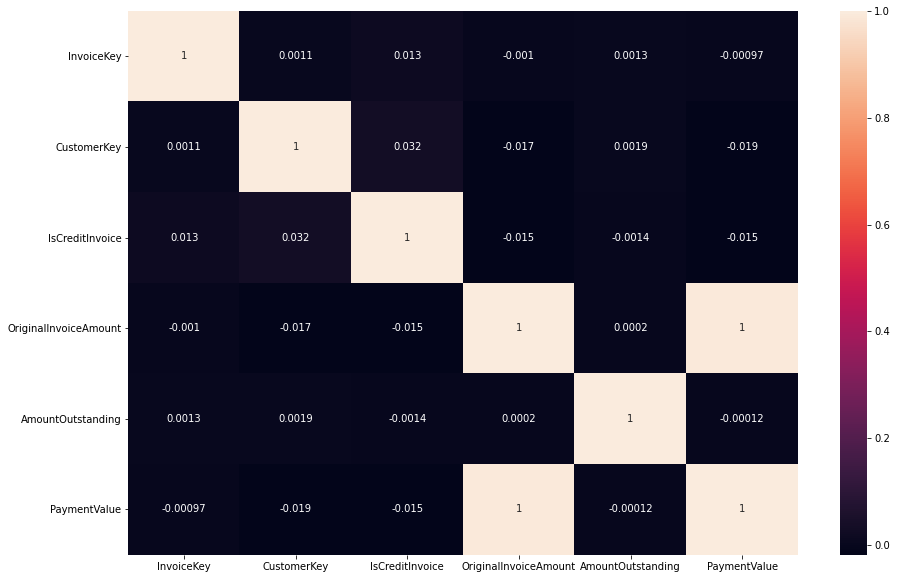

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

## Histograms

In [ ]:
#df["StatementTransactionType"].nunique()
trans_types = df["StatementTransactionType"].value_counts()
trans_types

INV    352165
CRN      7057
JRN      1278
CSH      1019
Name: StatementTransactionType, dtype: int64

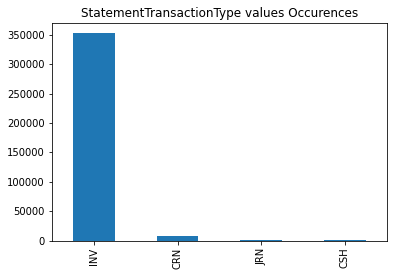

In [ ]:
trans_types.plot(kind = "bar", title = "StatementTransactionType values Occurences")

In [ ]:
credits_amount = df["IsCreditInvoice"].value_counts()
credits_amount

0    352936
1      8583
Name: IsCreditInvoice, dtype: int64

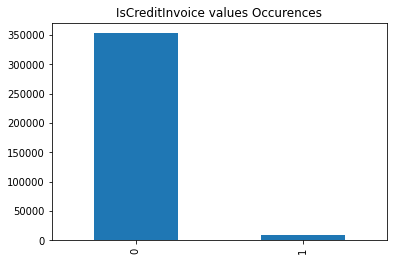

In [ ]:
credits_amount.plot(kind = "bar",title = "IsCreditInvoice values Occurences")

In [ ]:
pay_types = df["PaymentType"].value_counts()
pay_types

Barclays Multi    327982
CheckM8            33537
Name: PaymentType, dtype: int64

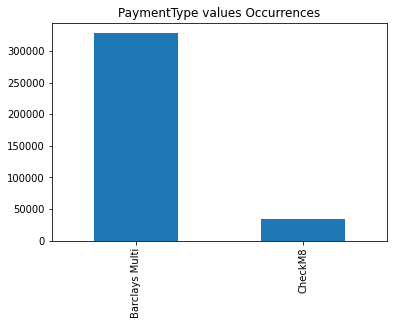

In [ ]:
pay_types.plot(kind = "bar", title = "PaymentType values Occurrences")

## Number of invoices/customer 



In [ ]:
#average number of invoices per customer
customers = df["CustomerKey"].value_counts().to_frame(name="occurences")
customers["occurences"].mean()

14.133429766605419

In [ ]:
#avg #invoices per customer / excluding the customers with only one invoice (filtering below lower bound)
#customers[customers.occurences != 1].plot(kind = "bar", title = "Number of Invoices per Customer") ##too many customers, cant do histogram
customers_filtered = customers[customers.occurences != 1]
customers_filtered["occurences"].mean()

16.538390379278447

In [ ]:
#standard deviation
customers_filtered["occurences"].std()

63.16403868621502

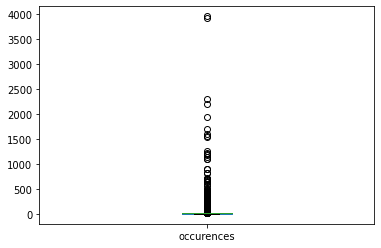

In [ ]:
#finding upper bound to filter out #invoices
customers_filtered.plot.box()

15.21398815034253
32.264942456544276


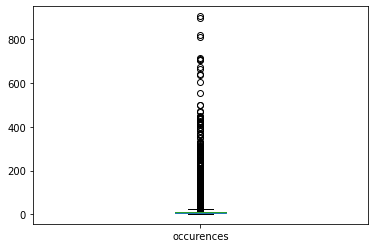

In [ ]:
#customers_filtered[customers_filtered.occurences > 3000] only 14 customers with more than 1000 invoices
customers_filtered = customers_filtered[customers_filtered.occurences < 1000]
print(customers_filtered["occurences"].mean())
print(customers_filtered["occurences"].std())
customers_filtered.plot.box()

In [ ]:
# looking at the highest values
#(customers_filtered.sort_values(by = ["occurences"], ascending=False))[:15]

,occurences
16876991,2289
16745645,2191
16737254,1935
16836264,1692
16739410,1608
16885817,1564
16787691,1543
16832368,1254
16910812,1219
16837342,1200


# Box Plots

In [ ]:
pay_dates = df["PaymentDate"].nunique()
pay_dates = df["PaymentDate"].value_counts()
pay_dates

2018-11-30    5091
2018-09-28    4680
2019-03-29    4532
2019-06-28    4493
2019-05-31    4181
              ... 
2020-09-03       1
2020-05-26       1
2020-02-24       1
2020-06-04       1
2020-07-01       1
Name: PaymentDate, Length: 492, dtype: int64

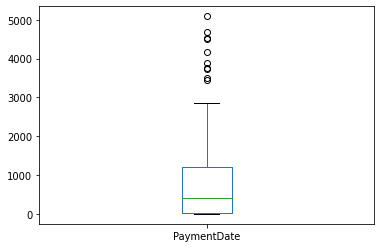

In [ ]:
pay_dates.plot.box()

# Information per customer

In [ ]:
#Invoices per customer
customers = df["CustomerKey"].value_counts().to_frame(name="occurences")
customers
#average number of invoices per customer
#customers["occurences"].mean() 

,occurences
16745090,3953
16738849,3927
16876991,2289
16745645,2191
16737254,1935
...,...
16983848,1
16977709,1
16979381,1
16973192,1


In [ ]:
#number of customers that only have one invoice
print(customers[customers.occurences == 1].count())

occurences    3959
dtype: int64


In [ ]:
#average values of continues variables per customers 
info_customer = df.groupby("CustomerKey").mean() #average Original Invoice Amount and average Payment Value
info_customer = info_customer.drop(labels = "InvoiceKey", axis = 1) 
info_customer = info_customer.drop(labels = "IsCreditInvoice", axis = 1) 

## Possible Outliers

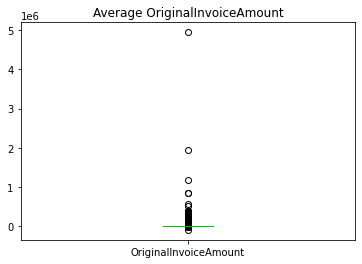

In [ ]:
#Looking at the distribution of avg OriginalInvoiceAmount
info_customer["OriginalInvoiceAmount"].plot.box(title = "Average OriginalInvoiceAmount")

In [ ]:
# Customers with an average OriginalInvoiceAmount greater than 0.5million
info_customer[info_customer.OriginalInvoiceAmount > 500000]
outliers = (info_customer[info_customer.OriginalInvoiceAmount > 500000])
outliers.count() #only 7 

InvoiceKey               7
IsCreditInvoice          7
OriginalInvoiceAmount    7
AmountOutstanding        7
PaymentValue             7
dtype: int64

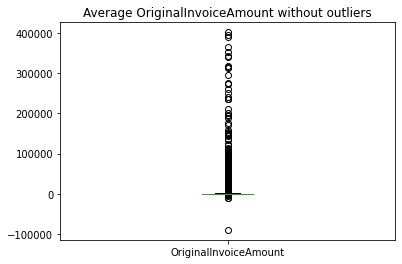

In [ ]:
# Box plot wihtout the possible outliers: customers with an avg OriginalInvoiceAmount > 0.5million
customers_outliers = info_customer.drop(index = outliers.index)
customers_outliers["OriginalInvoiceAmount"].plot.box(title = "Average OriginalInvoiceAmount without outliers")

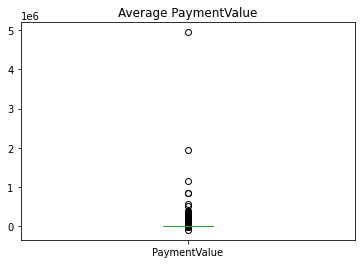

In [ ]:
# Same steps for possible outliers with average PaymentValue
info_customer["PaymentValue"].plot.box(title = "Average PaymentValue")

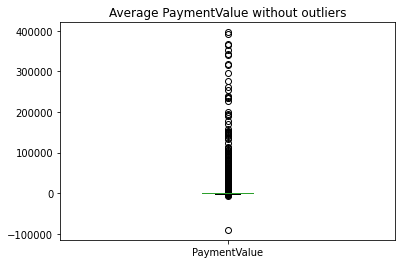

In [ ]:
info_customer[info_customer.PaymentValue > 500000]
outliers_payment = (info_customer[info_customer.PaymentValue > 500000])
outliers_payment.count() #only 7 
customers_outliers_payment = info_customer.drop(index = outliers_payment.index)
customers_outliers_payment["PaymentValue"].plot.box(title = "Average PaymentValue without outliers")

In [ ]:
#Customers with non-zero Amount Outstanding / people that dont clear out their amount outstanding
customers_owe = info_customer[info_customer.AmountOutstanding != 0]
customers_owe.count()

InvoiceKey                     23
IsCreditInvoice                23
OriginalInvoiceAmount          23
AmountOutstanding              23
PaymentValue                   23
InvoiceAmount-PaymentAmount    23
dtype: int64

In [ ]:
#see how much the customers owe on average 
info_customer["InvoiceAmount-PaymentAmount"] = pd.Series(info_customer.OriginalInvoiceAmount - info_customer.PaymentValue,index = info_customer.index)
customers_owe = info_customer[info_customer.AmountOutstanding != 0]
customers_owe

,OriginalInvoiceAmount,AmountOutstanding,PaymentValue,InvoiceAmount-PaymentAmount
CustomerKey,,,,
16737254,329.888067,0.169059,326.329214,3.558853
16743648,1311.976359,4.555179,1256.011436,55.964923
16745090,587.667625,0.003959,586.090139,1.577485
16752657,780.663871,0.000054,780.662849,0.001022
16787691,591.425353,7.199721,477.627952,113.797401
16827936,1020.735000,29.055000,954.180000,66.555000
16858889,139.336488,0.038180,139.279122,0.057366
16859739,2183.440000,441.970000,250.000000,1933.440000
16869741,369.917097,2.418065,298.391935,71.525161


**Check data points per month**

In [ ]:
#Making dates on DF into date type
#df.head()
df["RaisedDate"] = pd.to_datetime(df["RaisedDate"])
df["DueDate"] = pd.to_datetime(df["DueDate"])
df["PaymentDate"] = pd.to_datetime(df["PaymentDate"])


In [ ]:
df.head()

,InvoiceKey,CustomerKey,IsCreditInvoice,RaisedDate,DueDate,OriginalInvoiceAmount,AmountOutstanding,StatementTransactionType,PaymentValue,PaymentDate,PaymentType
0,196697217,16817529,1,2018-01-03,2018-01-03,-626.38,0.0,JRN,-626.38,2019-12-17,Barclays Multi
1,195746315,16743753,0,2018-01-05,2018-02-28,3082.20,0.0,INV,3082.20,2018-11-29,CheckM8
2,195574232,16742415,1,2018-01-05,2018-01-05,-820.26,0.0,CRN,-820.26,2020-03-05,Barclays Multi
3,195861541,16742646,1,2018-01-11,2018-01-11,-15.60,0.0,CRN,-15.60,2018-11-09,CheckM8
4,196222694,16915326,1,2018-01-22,2018-01-22,-18.00,0.0,CRN,-18.00,2018-09-14,CheckM8


In [ ]:
#df[df.RaisedDate].month == "01"
value = df.loc[df["RaisedDate"].dt.month == 1].count()
value = value.to_frame(name = "count")
(value[value.index == "InvoiceKey"])["count"]

InvoiceKey    17
Name: count, dtype: int64

In [ ]:
#counting the amount of invoices raised transactions per month
for i in range(12):
  print("Invoices raised on month {}:".format(i+1))
  value = df.loc[df["RaisedDate"].dt.month == i+1].count()
  value = value.to_frame(name = "count")
  print((value[value.index == "InvoiceKey"])["count"])

Invoices raised on month 1:
InvoiceKey    17
Name: count, dtype: int64
Invoices raised on month 2:
InvoiceKey    24
Name: count, dtype: int64
Invoices raised on month 3:
InvoiceKey    36
Name: count, dtype: int64
Invoices raised on month 4:
InvoiceKey    72
Name: count, dtype: int64
Invoices raised on month 5:
InvoiceKey    127
Name: count, dtype: int64
Invoices raised on month 6:
InvoiceKey    471
Name: count, dtype: int64
Invoices raised on month 7:
InvoiceKey    2164
Name: count, dtype: int64
Invoices raised on month 8:
InvoiceKey    1421
Name: count, dtype: int64
Invoices raised on month 9:
InvoiceKey    0
Name: count, dtype: int64
Invoices raised on month 10:
InvoiceKey    0
Name: count, dtype: int64
Invoices raised on month 11:
InvoiceKey    0
Name: count, dtype: int64
Invoices raised on month 12:
InvoiceKey    0
Name: count, dtype: int64


In [ ]:
#raised_months = pd.DataFrame(data = {"January":167,"February":251,"March":511,"April":997,"May":1881,"June":6046,"July":22371,"August":30289,"September":34678,"October":31265,"November":5086,"December":0})
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
raised_months = [167,251,511,997,1881,6046,22371,30289,34678,31265,5086,0]
d = {"Month": months,"InvoicesRaised":raised_months}
raised_months = pd.DataFrame(data = d)

In [ ]:
raised_months

,Month,InvoicesRaised
0,January,167
1,February,251
2,March,511
3,April,997
4,May,1881
5,June,6046
6,July,22371
7,August,30289
8,September,34678
9,October,31265


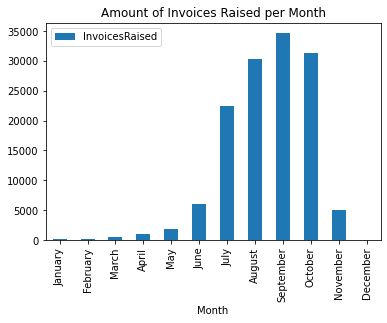

In [ ]:
raised_months.plot.bar(x = "Month", y = "InvoicesRaised",title = "Amount of Invoices Raised per Month") 

In [ ]:
#counting the amount of payments made per month
for i in range(12):
  print("Pyments made on month {}:".format(i+1))
  value = df.loc[df["PaymentDate"].dt.month == i+1].count()
  value = value.to_frame(name = "count")
  print((value[value.index == "InvoiceKey"])["count"])

Pyments made on month 1:
InvoiceKey    74
Name: count, dtype: int64
Pyments made on month 2:
InvoiceKey    43
Name: count, dtype: int64
Pyments made on month 3:
InvoiceKey    39
Name: count, dtype: int64
Pyments made on month 4:
InvoiceKey    29
Name: count, dtype: int64
Pyments made on month 5:
InvoiceKey    10
Name: count, dtype: int64
Pyments made on month 6:
InvoiceKey    23
Name: count, dtype: int64
Pyments made on month 7:
InvoiceKey    5
Name: count, dtype: int64
Pyments made on month 8:
InvoiceKey    4
Name: count, dtype: int64
Pyments made on month 9:
InvoiceKey    2537
Name: count, dtype: int64
Pyments made on month 10:
InvoiceKey    1123
Name: count, dtype: int64
Pyments made on month 11:
InvoiceKey    303
Name: count, dtype: int64
Pyments made on month 12:
InvoiceKey    142
Name: count, dtype: int64


In [ ]:
payments_made = [6898,3649,1155,823,444,234,194,3856,27940,35449,33247,19653]
d = {"Month": months,"PaymentsMade":payments_made}
payments_made = pd.DataFrame(data = d)
payments_made

,Month,PaymentsMade
0,January,6898
1,February,3649
2,March,1155
3,April,823
4,May,444
5,June,234
6,July,194
7,August,3856
8,September,27940
9,October,35449


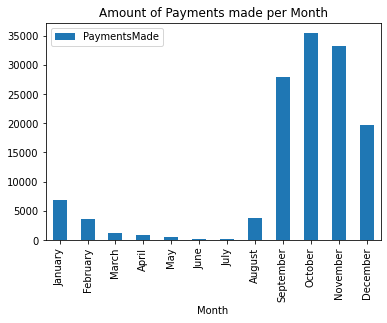

In [ ]:
payments_made.plot.bar(x = "Month", y = "PaymentsMade",title = "Amount of Payments made per Month") 

## Customers that have ceased to exist

In [ ]:
# CustomersID of customers with one invoice
customers_one = customers[customers.occurences == 1]
customers_one

,occurences
16888038,1
16837809,1
16768375,1
16766977,1
16972011,1
...,...
16724600,1
16837243,1
16775809,1
16745090,1
